<a href="https://colab.research.google.com/github/wadh5811/AI/blob/main/hw1_tg2626.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!apt install -qq enchant

In [23]:
!pip install pyenchant

In [24]:
import enchant, string
import matplotlib.pyplot as plt
from heapq import heappush, heappop, heapify

d = enchant.Dict("en_US")

def successors(state):
    """
    Given a word, find all possible English word results from changing one letter.
    Return a list of (action, word) pairs, where action is the index of the
    changed letter.
    """
    
    child_states = []
    for i in range(len(state)):
        new = [state[:i]+x+state[i+1:] for x in string.ascii_lowercase]
        words = [x for x in new if d.check(x) and x != state]
        child_states = child_states + [(i, word) for word in words]
    return child_states

In [25]:
"""
5.1: Best-first search
"""
def best_first_search(start, goal, f):
    """
    Inputs: Start state, goal state, priority function
    Returns node containing goal or None if no goal found, total nodes expanded,
    frontier size per iteration
    """
    node = {'state':start, 'parent':None, 'cost':0}
    frontier = []
    reached = {}
    nodes_expanded = 0
    frontier_size = [len(frontier)]

    # COMPLETE THIS FUNCTION
    #minheap
    heapify(frontier)
    heappush(frontier,(0, node['state'],node))
    reached[start] = 0
    while frontier!=None:
        frontier_size.append(len(frontier))
        node = heappop(frontier)
        node = node[2]
        if goal == node['state']:
            return node, nodes_expanded, frontier_size
        b = node['state']
        nodes_expanded+=1
        for child in successors(b):
            s = child[1]
            if s not in reached or node['cost']+1 < reached[s]:
                a = {'state':s, 'parent':node, 'cost':node['cost']+1}
                reached[s] = a['cost']
                heappush(frontier,(f(a,goal),s,a))

    return None, nodes_expanded, frontier_size


In [26]:
"""
5.2: Priority functions
"""
def f_dfs(node, goal=None):
    # IMPLEMENT THIS FUNCTION
    return -node['cost']

def f_bfs(node, goal=None):
    # IMPLEMENT THIS FUNCTION
    return node['cost']

def f_ucs(node, goal=None):
    # IMPLEMENT THIS FUNCTION
    return node['cost']

def hamming_distance(string1, string2): 
    distance = 0
    L = len(string1)
    for i in range(L):
        if string1[i] != string2[i]:
            distance += 1
    return distance
    # 
def f_astar(node, goal):
    return hamming_distance(node['state'],goal) + node['cost']


In [27]:
def sequence(node):
    """
    Given a node, follow its parents back to the start state.
    Return sequence of words from start to goal.
    """
    words = [node['state']]
    while node['parent'] is not None:
        node = node['parent']
        words.insert(0, node['state'])
    return words

start = fat and goal = cop

dfs
['fat', 'bat', 'baa', 'boa', 'bob', 'bib', 'bid', 'aid', 'add', 'ado', 'ago', 'age', 'ace', 'act', 'aft', 'oft', 'off', 'eff', 'elf', 'elk', 'eek', 'eel', 'gel', 'gal', 'cal', 'cab', 'cub', 'cud', 'cod', 'cop']
nodes expanded: 29554
length of solution:29

bfs
['fat', 'cat', 'cap', 'cop']
nodes expanded: 254
length of solution:3

ucs
['fat', 'cat', 'cap', 'cop']
nodes expanded: 254
length of solution:3

astar
['fat', 'cat', 'cap', 'cop']
nodes expanded: 3
length of solution:3




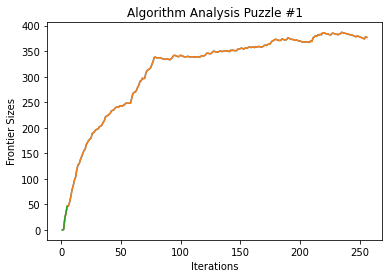



start = cold and goal = warm

bfs
['cold', 'cord', 'card', 'ward', 'warm']
nodes expanded: 1159
length of solution: 4

ucs
['cold', 'cord', 'card', 'ward', 'warm']
nodes expanded: 1159
length of solution: 4

astar
['cold', 'cord', 'card', 'ward', 'warm']
nodes expanded: 5
length of solution: 4




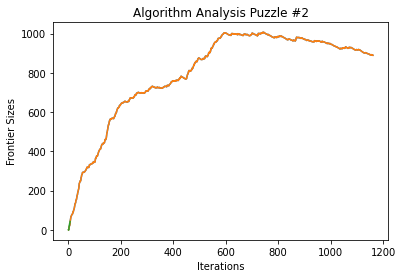



start = small and goal = large

bfs
['small', 'stall', 'stale', 'state', 'stats', 'seats', 'teats', 'tents', 'tints', 'tings', 'tangs', 'tango', 'mango', 'mange', 'marge', 'large']
nodes expanded: 3832
length of solution: 15

ucs
['small', 'stall', 'stale', 'state', 'stats', 'seats', 'teats', 'tents', 'tints', 'tings', 'tangs', 'tango', 'mango', 'mange', 'marge', 'large']
nodes expanded: 3832
length of solution: 15

astar
['small', 'shall', 'shale', 'shade', 'shads', 'sheds', 'seeds', 'sends', 'sands', 'sandy', 'randy', 'rangy', 'range', 'mange', 'marge', 'large']
nodes expanded: 2553
length of solution: 15




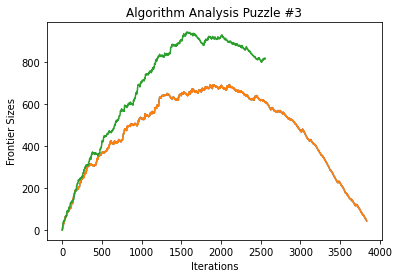

In [28]:
if __name__ == '__main__':

    #first puzzle
    start = 'fat'
    goal = 'cop'
    
    frontier_sizes = []
    print('start = fat and goal = cop')
    print('\n'+'dfs')
    solution = best_first_search(start, goal, f_dfs)
    print(sequence(solution[0]))
    print('nodes expanded: '+ str(solution[1]))
    print('length of solution:' + str(solution[0]['cost']))

    print('\n'+'bfs')
    solution = best_first_search(start, goal, f_bfs)
    print(sequence(solution[0]))
    print('nodes expanded: '+ str(solution[1]))
    print('length of solution:' + str(solution[0]['cost']))
    plt.plot(list(range(1, len(solution[2])+1)),solution[2])
    
    print('\n'+'ucs')
    solution = best_first_search(start, goal, f_ucs)
    print(sequence(solution[0]))
    print('nodes expanded: '+ str(solution[1]))
    print('length of solution:' + str(solution[0]['cost']))
    plt.plot(list(range(1, len(solution[2])+1)),solution[2])

    print('\n'+'astar')
    solution = best_first_search(start, goal, f_astar)
    print(sequence(solution[0]))
    print('nodes expanded: '+ str(solution[1]))
    print('length of solution:' + str(solution[0]['cost']))
    plt.plot(list(range(1, len(solution[2])+1)),solution[2])
   
    print('\n') 
    plt.title("Algorithm Analysis Puzzle #1")
    plt.xlabel("Iterations")
    plt.ylabel("Frontier Sizes")
    plt.show()

    #second puzzle
    start = 'cold'
    goal = 'warm'

    print('\n')
    print('start = cold and goal = warm')
    frontier_sizes = []

    print('\n'+'bfs')
    solution = best_first_search(start, goal, f_bfs)
    print(sequence(solution[0]))
    print('nodes expanded: '+ str(solution[1]))
    print('length of solution: ' + str(solution[0]['cost']))
    plt.plot(list(range(1, len(solution[2])+1)),solution[2])
    
    print('\n'+'ucs')
    solution = best_first_search(start, goal, f_ucs)
    print(sequence(solution[0]))
    print('nodes expanded: '+ str(solution[1]))
    print('length of solution: ' + str(solution[0]['cost']))
    plt.plot(list(range(1, len(solution[2])+1)),solution[2])

    print('\n'+'astar')
    solution = best_first_search(start, goal, f_astar)
    print(sequence(solution[0]))
    print('nodes expanded: '+ str(solution[1]))
    print('length of solution: ' + str(solution[0]['cost']))
    plt.plot(list(range(1, len(solution[2])+1)),solution[2])

    print('\n') 
    plt.title("Algorithm Analysis Puzzle #2")
    plt.xlabel("Iterations")
    plt.ylabel("Frontier Sizes")
    plt.show()

    #third puzzle
    start = 'small'
    goal = 'large'

    print('\n')
    print('start = small and goal = large')
    frontier_sizes = []

    print('\n'+'bfs')
    solution = best_first_search(start, goal, f_bfs)
    print(sequence(solution[0]))
    print('nodes expanded: '+ str(solution[1]))
    print('length of solution: ' + str(solution[0]['cost']))
    plt.plot(list(range(1, len(solution[2])+1)),solution[2])

    print('\n'+'ucs')
    solution = best_first_search(start, goal, f_ucs)
    print(sequence(solution[0]))
    print('nodes expanded: '+ str(solution[1]))
    print('length of solution: ' + str(solution[0]['cost']))
    plt.plot(list(range(1, len(solution[2])+1)),solution[2])

    print('\n'+'astar')
    solution = best_first_search(start, goal, f_astar)
    print(sequence(solution[0]))
    print('nodes expanded: '+ str(solution[1]))
    print('length of solution: ' + str(solution[0]['cost']))
    plt.plot(list(range(1, len(solution[2])+1)),solution[2])
   
    print('\n') 
    plt.title("Algorithm Analysis Puzzle #3")
    plt.xlabel("Iterations")
    plt.ylabel("Frontier Sizes")
    plt.show()